# 1. Read Loan Data
Read the loan data CSV file into a pandas DataFrame. Display the first few rows to verify successful loading.

In [2]:
import pandas as pd

# Read the loan data
rawLoanData = pd.read_csv('data/loanApproval/loan_data.csv')

# Display the first 5 rows
display(rawLoanData.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
# For EDA: Outcome variable Map to Boolean
rawLoanData['loan_status'] = rawLoanData['loan_status'].map({1: True, 0: False})
print(rawLoanData.dtypes)

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                          bool
dtype: object


# 2. <cleanup> Categorical Variables
- Identify categorical columns.

- Check for inconsistent values:
Ensure values like "female", "male" are consistent (no typos, extra spaces, or case differences).
For education, home ownership, and loan intent, check for spelling/case inconsistencies. 

- Reduce cardinality:
For columns like person_education or loan_intent, if there are rare categories, consider grouping them as "Other" for easier analysis.

- Standardize categories:
Make sure similar categories are unified (e.g., "High School" vs "high school").

- Check for duplicates:
Ensure there are no duplicate categories due to typos.


In [4]:
# Identify categorical columns
categorical_cols = rawLoanData.select_dtypes(include=['object', 'category', 'boolean']).columns.tolist()
print('Categorical columns:', categorical_cols)

# Identify numerical columns
numerical_cols = rawLoanData.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Numerical columns:', numerical_cols)

# Encode categorical variables using one-hot encoding as an example
# rawLoanData_encoded = pd.get_dummies(rawLoanData, columns=categorical_cols, drop_first=True)

# Display the first 5 rows of the encoded DataFrame
# display(rawLoanData_encoded.head())

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [5]:
# Categorical columns to check

# 1. Strip spaces and lower case for consistency
for col in categorical_cols:
    rawLoanData[col] = rawLoanData[col].astype(str).str.strip().str.lower()

# 2. Check value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(rawLoanData[col].value_counts(dropna=False))

# 3. Group rare categories (example: less than 1% frequency)
for col in categorical_cols:
    freq = rawLoanData[col].value_counts(normalize=True)
    print(f"\nFrequency of categories in {col}:" + str(freq))
    rare = freq[freq < 0.01].index
    print(f"\nRare categories in {col}: {rare.tolist()}")   
    rawLoanData[col] = rawLoanData[col].replace(rare, 'other')

# Display cleaned categorical columns
display(rawLoanData[categorical_cols].head())


Value counts for person_gender:
person_gender
male      24841
female    20159
Name: count, dtype: int64

Value counts for person_education:
person_education
bachelor       13399
associate      12028
high school    11972
master          6980
doctorate        621
Name: count, dtype: int64

Value counts for person_home_ownership:
person_home_ownership
rent        23443
mortgage    18489
own          2951
other         117
Name: count, dtype: int64

Value counts for loan_intent:
loan_intent
education            9153
medical              8548
venture              7819
personal             7552
debtconsolidation    7145
homeimprovement      4783
Name: count, dtype: int64

Value counts for previous_loan_defaults_on_file:
previous_loan_defaults_on_file
yes    22858
no     22142
Name: count, dtype: int64

Value counts for loan_status:
loan_status
false    35000
true     10000
Name: count, dtype: int64

Frequency of categories in person_gender:person_gender
male      0.552022
female    0.447978

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
0,female,master,rent,personal,no,true
1,female,high school,own,education,yes,false
2,female,high school,mortgage,medical,no,true
3,female,bachelor,rent,medical,no,true
4,male,master,rent,medical,no,true


# 3. Handle Missing Values
Detect missing values in the dataset and apply strategies to handle them, such as imputation or removal.

In [6]:
# Check for missing values
missing_count = rawLoanData.isnull().sum()
missing_percent = 100 * missing_count / len(rawLoanData)
missing_summary = pd.DataFrame({
    'Total Missing Values': missing_count,
    'Percent Missing': missing_percent
})
print('Missing values per column:')
display(missing_summary.reset_index().rename(columns={'index': 'Columns'}))


# Example: Impute missing values with median for numeric columns
#rawLoanData_filled = rawLoanData_encoded.fillna(rawLoanData_encoded.median(numeric_only=True))

# Alternatively, drop rows with missing values
rawLoanData_filled = rawLoanData.dropna()

display(rawLoanData_filled.head())

Missing values per column:


,Columns,Total Missing Values,Percent Missing
0,person_age,0,0.0
1,person_gender,0,0.0
2,person_education,0,0.0
3,person_income,0,0.0
4,person_emp_exp,0,0.0
5,person_home_ownership,0,0.0
6,loan_amnt,0,0.0
7,loan_intent,0,0.0
8,loan_int_rate,0,0.0
9,loan_percent_income,0,0.0


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,master,71948.0,0,rent,35000.0,personal,16.02,0.49,3.0,561,no,true
1,21.0,female,high school,12282.0,0,own,1000.0,education,11.14,0.08,2.0,504,yes,false
2,25.0,female,high school,12438.0,3,mortgage,5500.0,medical,12.87,0.44,3.0,635,no,true
3,23.0,female,bachelor,79753.0,0,rent,35000.0,medical,15.23,0.44,2.0,675,no,true
4,24.0,male,master,66135.0,1,rent,35000.0,medical,14.27,0.53,4.0,586,no,true


# 4. Descriptive Analysis
Perform descriptive analysis on the cleaned data, including summary statistics and visualizations for key features.

In [7]:
print(rawLoanData.dtypes)

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                        object
dtype: object


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
display(rawLoanData_filled.describe())

# Distribution of a key numeric feature (replace 'LoanAmount' with actual column name)
if 'LoanAmount' in rawLoanData_filled.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(rawLoanData_filled['LoanAmount'], kde=True)
    plt.title('Distribution of Loan Amount')
    plt.show()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000


# 5. EDA
## A. Correlation Matrix of Numerical Features
**What:** Visualize the correlation matrix for all numerical variables in the dataset.  
**Why:** To identify relationships and dependencies between numerical features, which can inform feature selection and engineering.  
**Observation:** Most numerical features in the loan data show weak to moderate correlations. Notably, `person_income` and `loan_amount` are moderately correlated, suggesting higher-income applicants tend to request larger loans. `loan_amount` and `loan_percent_income` are strongly correlated, as expected from their calculation. No pairs exhibit very high correlations, so multicollinearity is not a major concern. Each feature appears to contribute unique information for modeling loan approval.

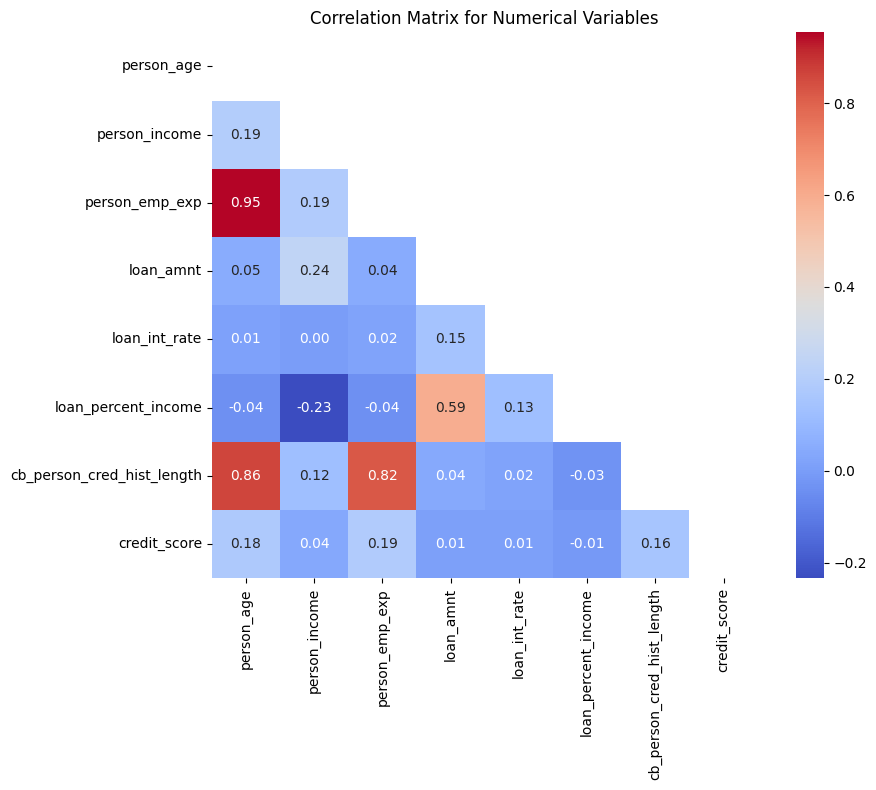

In [9]:
import numpy as np
import warnings
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

warnings.filterwarnings('ignore') 

def plot_correlation_matrix(df):
    # Select only numerical columns
    numeric_vars = df.select_dtypes(include=[np.number])
    # Compute correlation matrix
    corr_matrix = numeric_vars.corr()
    # Set up the mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    # Plot correlation matrix with values
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, mask=mask)
    plt.title('Correlation Matrix for Numerical Variables')
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(rawLoanData_filled)

## A. Target Variable Distribution
**What:** Visualize the distribution of the target variable (`loan_status`).  
**Why:** To check class balance (approved vs. not approved loans), which is important for model selection and evaluation.  
**Observation:** The plot reveals whether the dataset is balanced or imbalanced between approved and not approved loans. If the classes are imbalanced, special techniques (such as resampling or using appropriate metrics) may be needed during model training and evaluation.

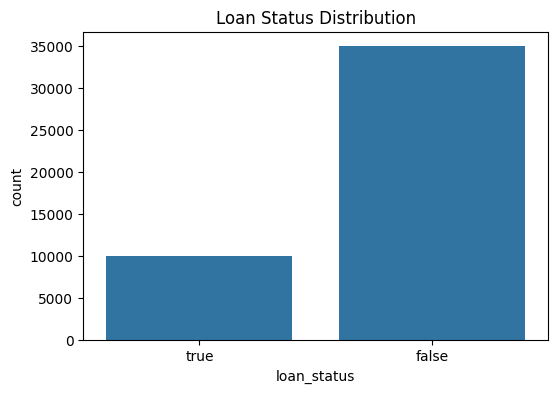

In [10]:
# Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=rawLoanData_filled)
plt.title('Loan Status Distribution')
plt.show()

## B. Numerical Feature Distributions
**What:** Plot histograms and boxplots for each numerical feature.  
**Why:** To understand the spread, skewness, and presence of outliers in numerical variables.  
**Observation:** The distributions show that some features are right-skewed (e.g., income, loan amount), indicating the presence of a few high-value applicants. Outliers are visible in several features, which may require transformation or robust modeling techniques. Most features are not normally distributed.

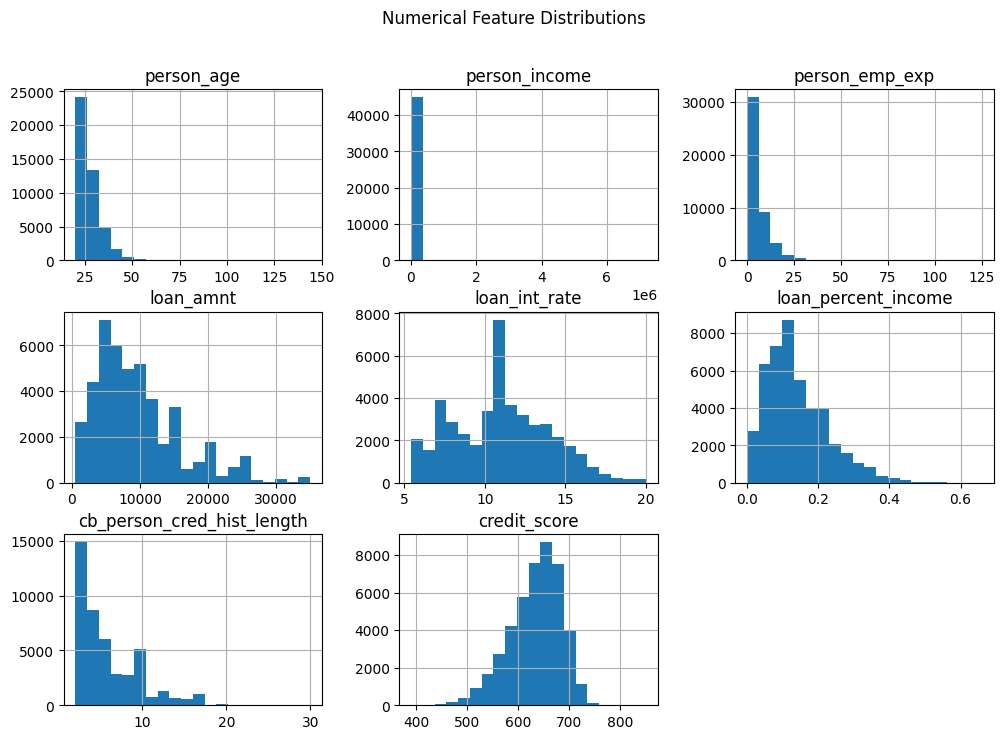

In [11]:
# Numerical Feature Distributions (Histograms)
num_cols = rawLoanData_filled.select_dtypes(include=['float64', 'int64']).columns
rawLoanData_filled[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle('Numerical Feature Distributions')
plt.show()

## C. Categorical Feature Distributions
**What:** Plot bar charts for each categorical feature.  
**Why:** To examine the frequency of each category and detect rare or dominant categories.  
**Observation:** The bar charts reveal that some categories (such as certain loan intents or education levels) are much more common than others. Rare categories may need to be grouped as 'Other' to avoid sparsity. Dominant categories could influence model bias if not handled properly.

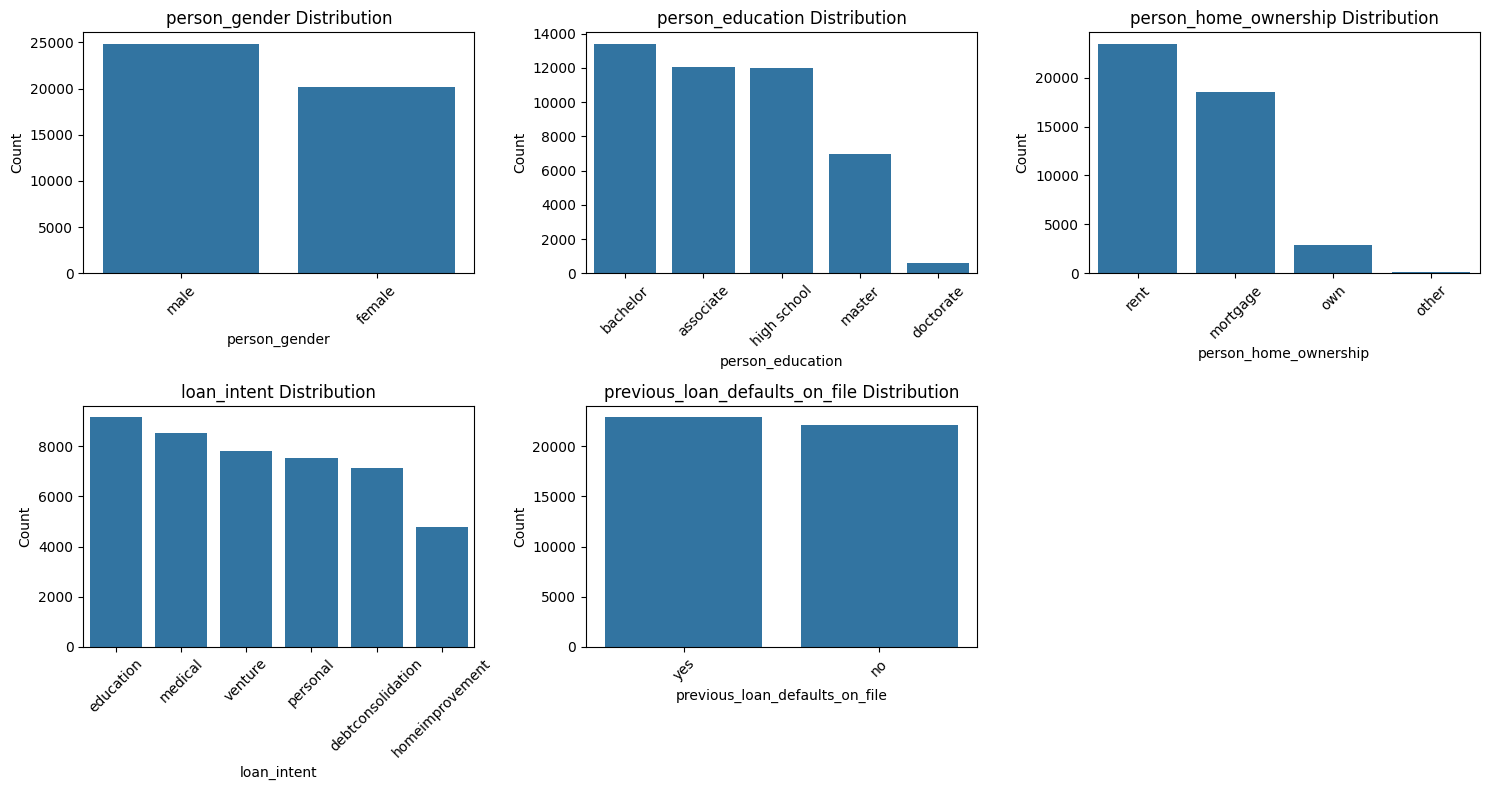

In [14]:
# Categorical Feature Distributions (Bar Plots)
cat_cols = rawLoanData_filled.select_dtypes(include=['object', 'boolean']).columns.drop('loan_status')
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=rawLoanData_filled, order=rawLoanData_filled[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].tick_params(axis='y', labelsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## D. Loan Status by Categorical Features
**What:** Plot loan approval status counts for each category in categorical features.  
**Why:** To see how loan approval rates differ across categories (e.g., gender, education).  
**Observation:** Approval rates vary across categories. For example, certain education levels or loan intents may have higher approval rates, indicating these features could be predictive. Disparities in approval rates highlight the importance of including these variables in the model and may suggest areas for further investigation.

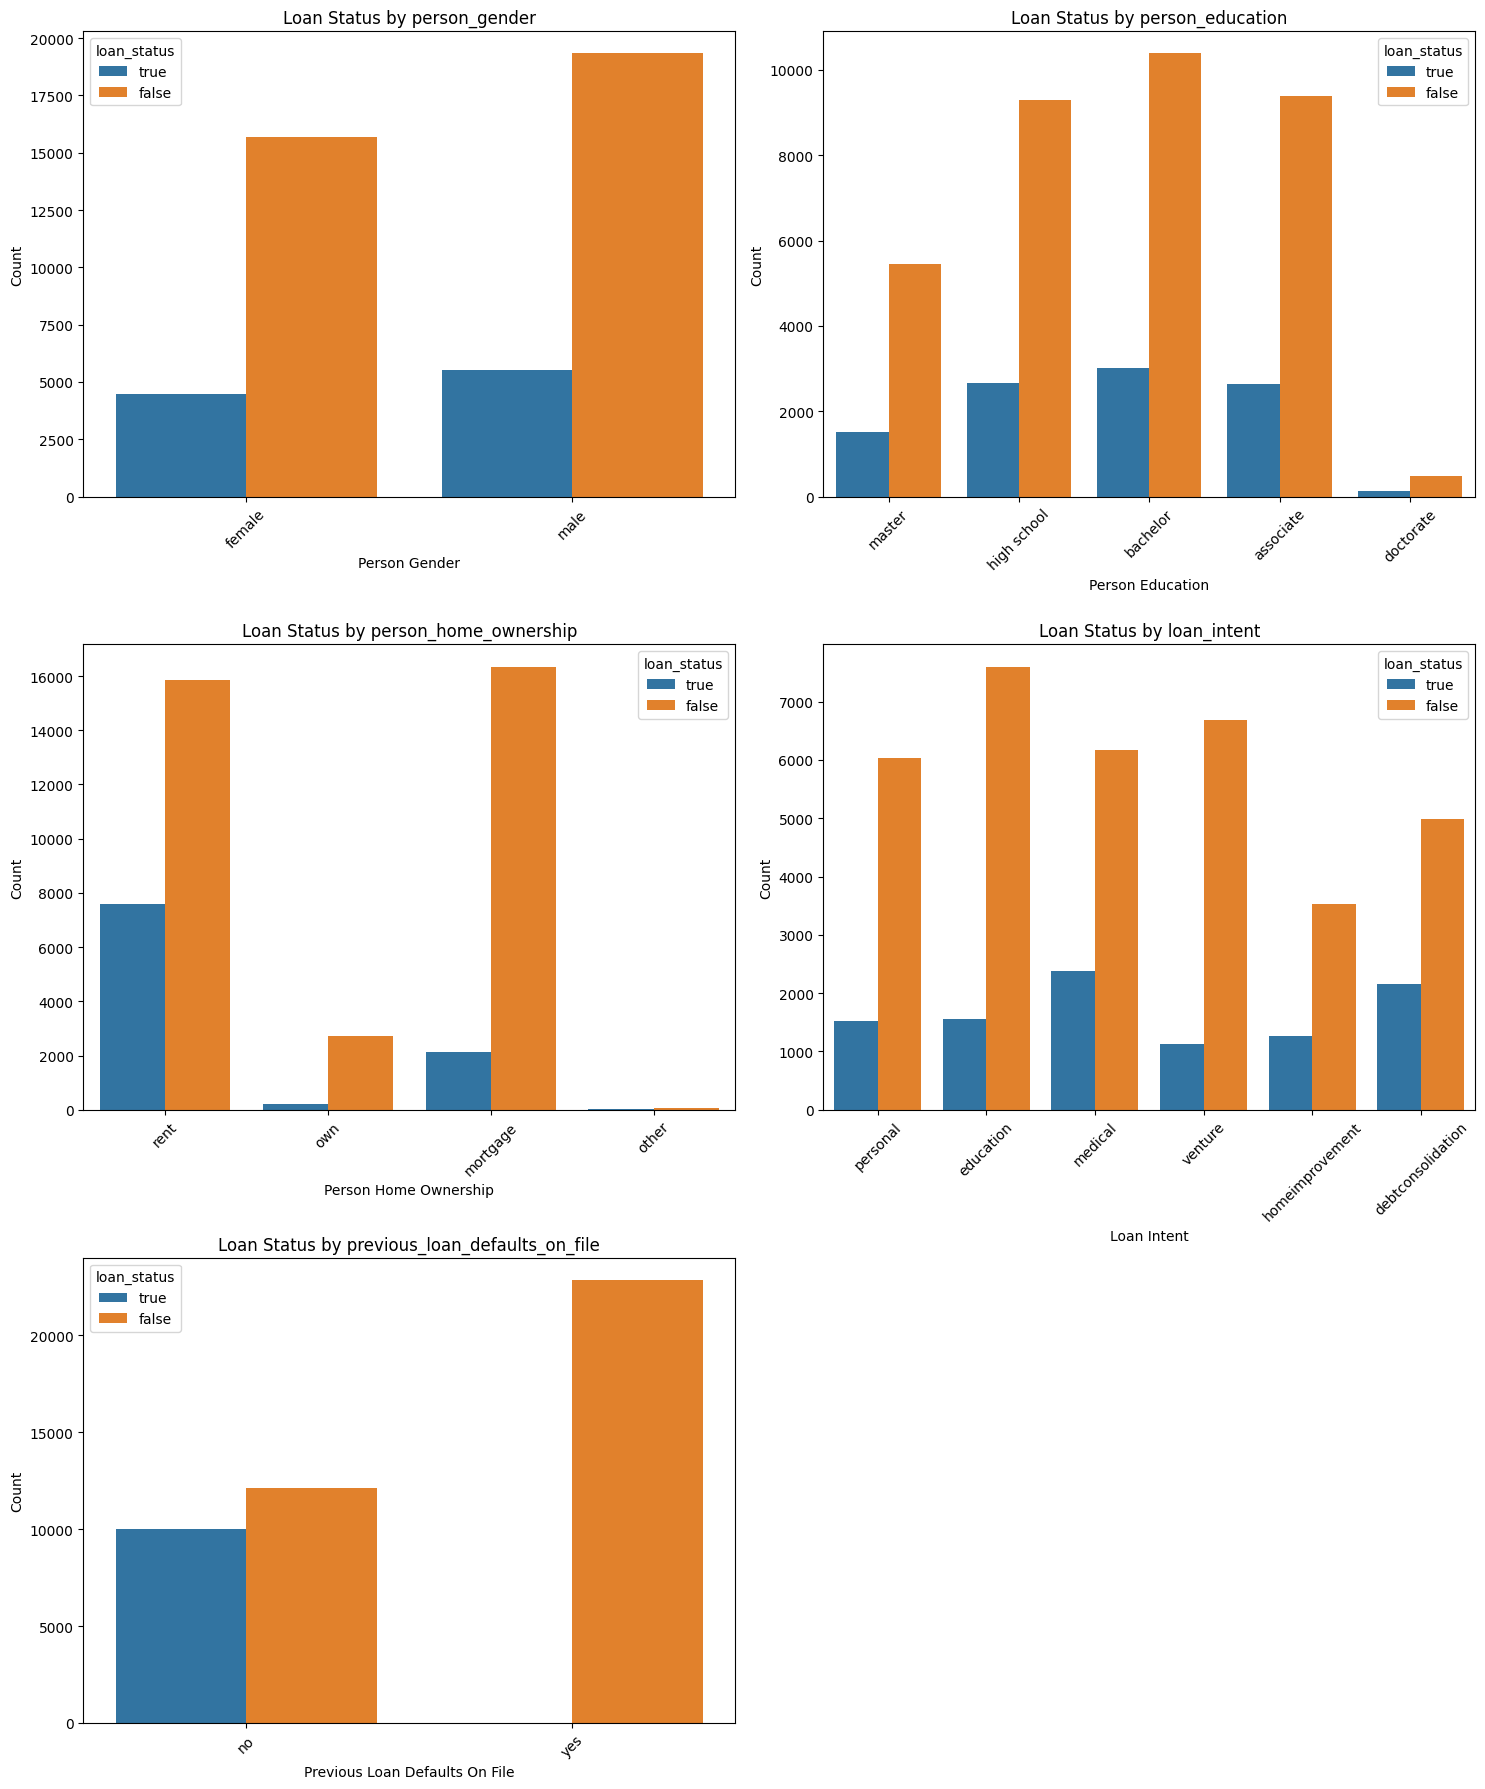

In [16]:
# Loan Status by Categorical Features (Stacked Bar Plots)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data=rawLoanData_filled, x=col, hue='loan_status', ax=axes[i])
    axes[i].set_title(f'Loan Status by {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Count')

# Remove empty subplot
if len(cat_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## E. Pairplot/Scatterplot Matrix
**What:** Visualize pairwise relationships between selected numerical features, colored by loan status.  
**Why:** To detect correlations and patterns between features and the target variable.  
**Observation:** The pairplot shows some separation between approved and not approved loans for features like income and loan amount. Clusters or trends may indicate which features are most useful for distinguishing between classes. Overlapping distributions suggest some features alone may not be sufficient for classification.

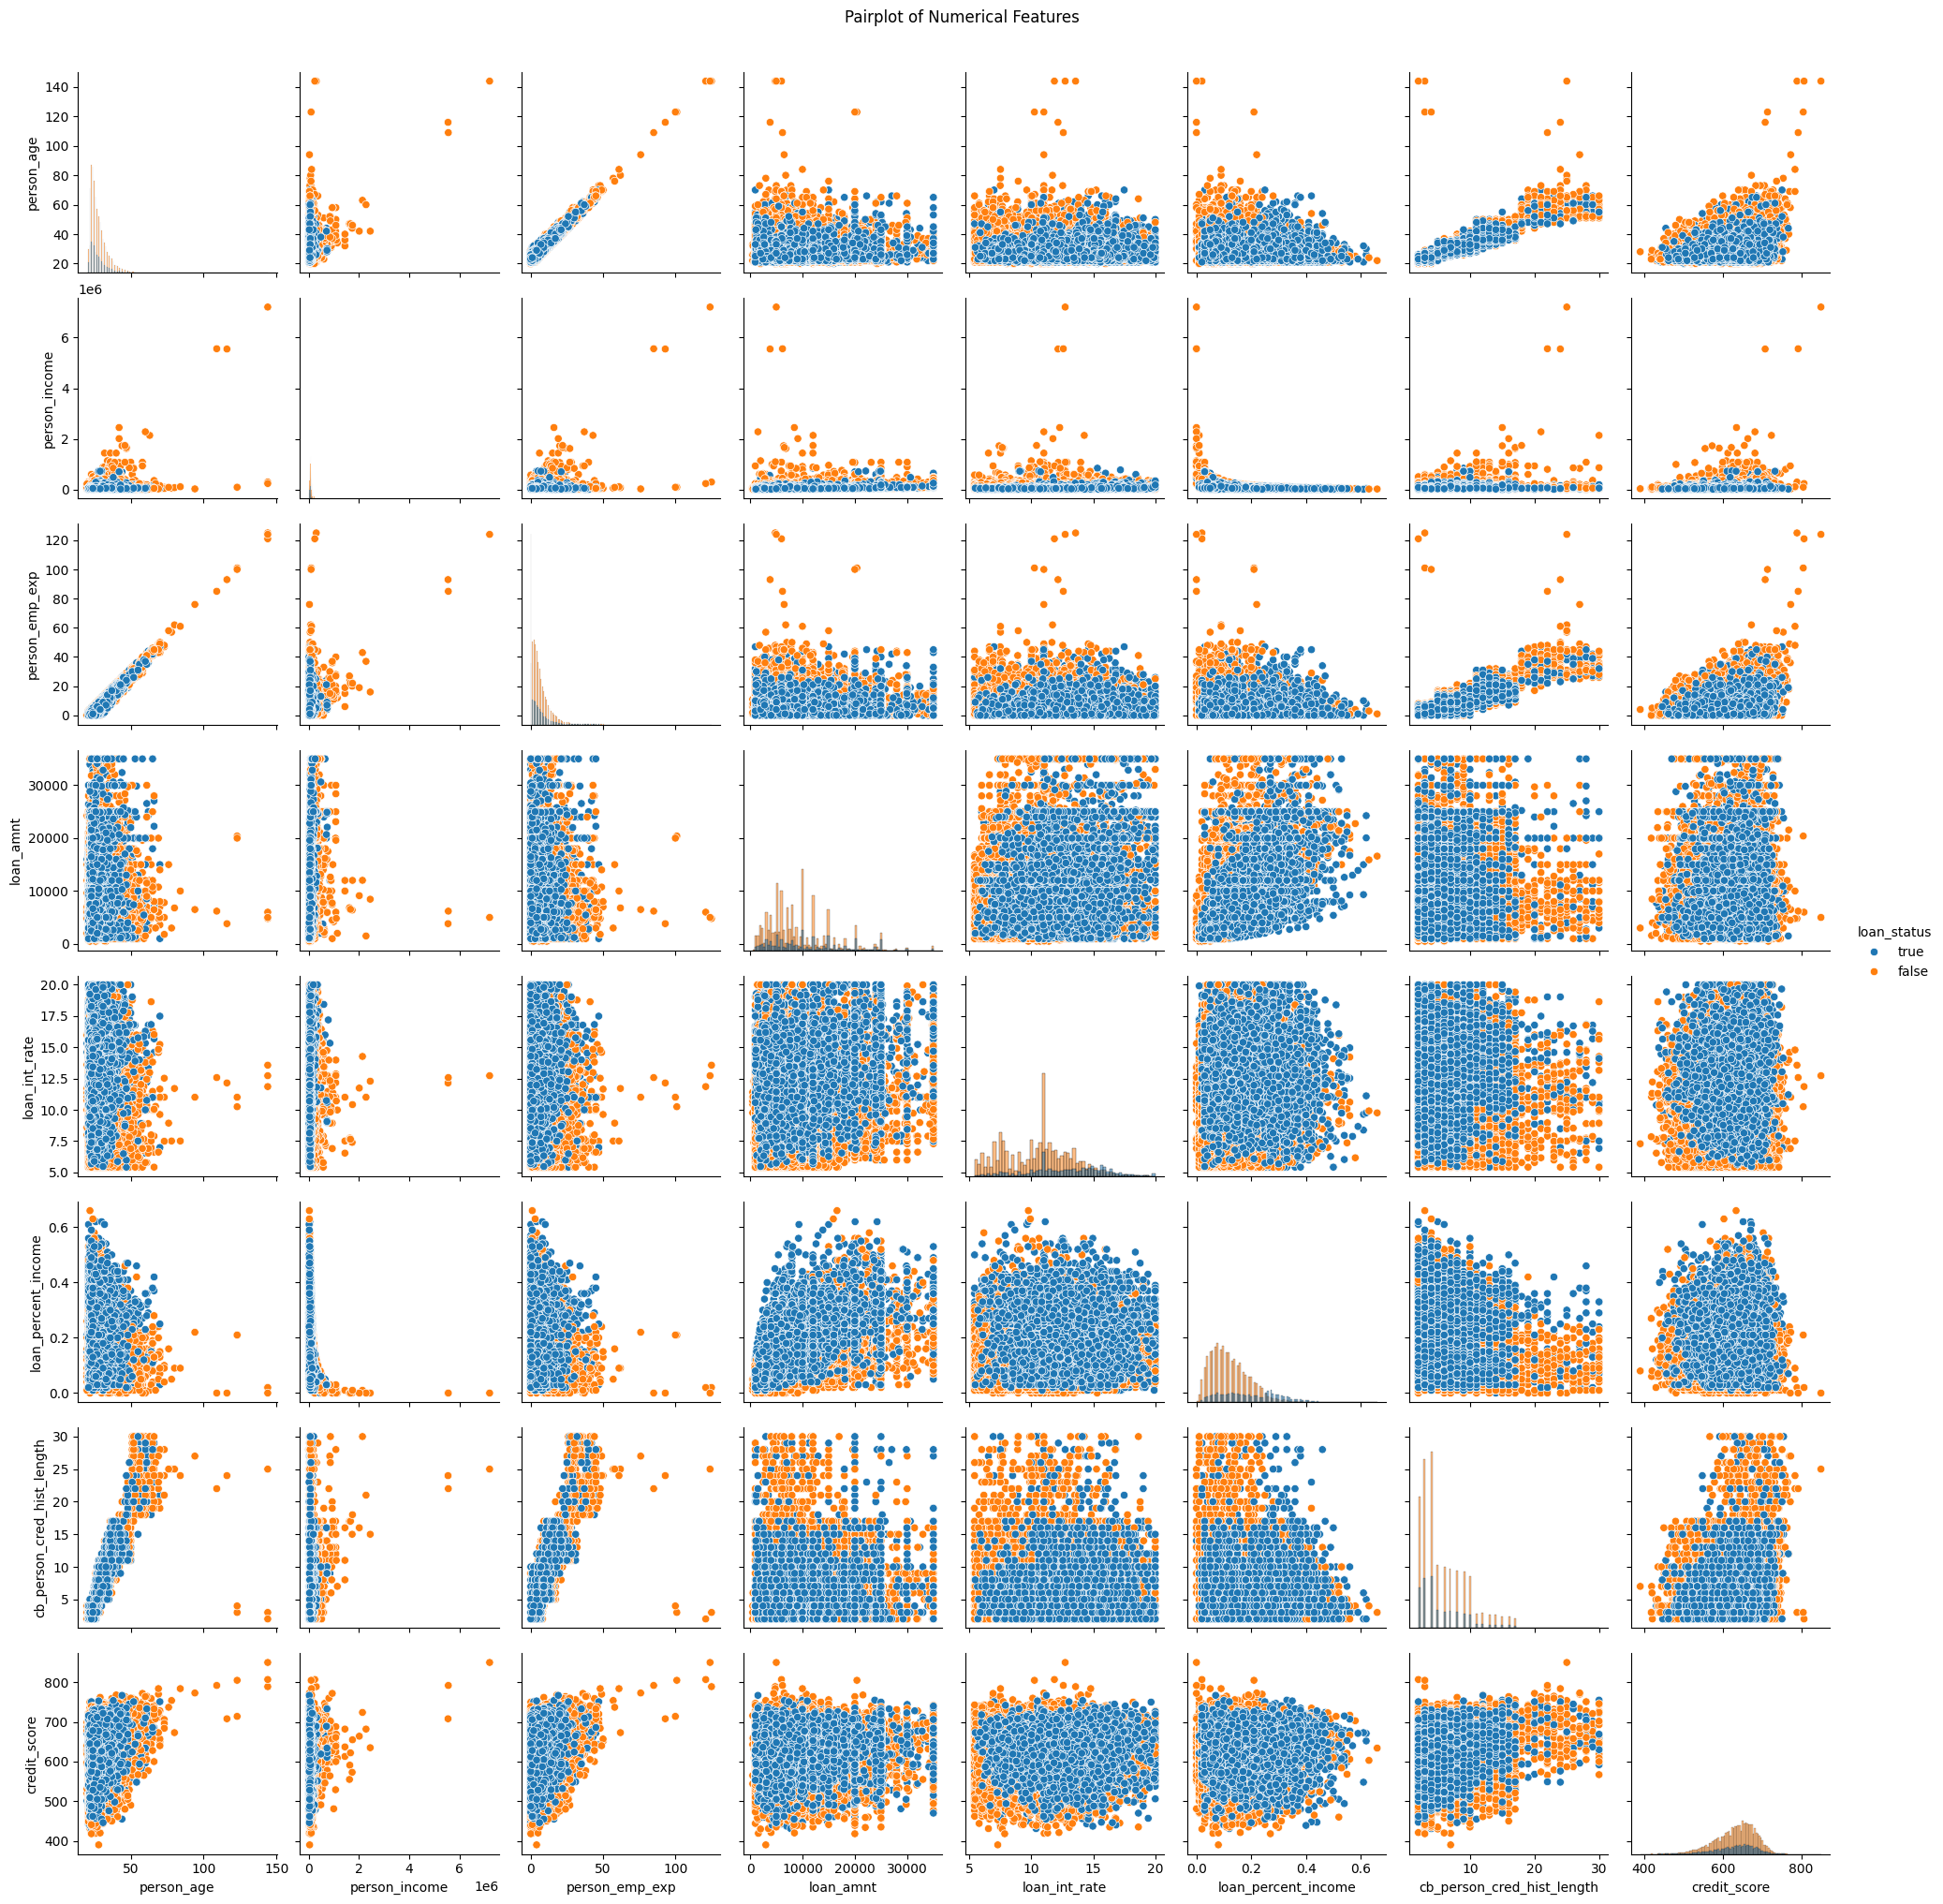

In [13]:
# Pairplot/Scatterplot Matrix
sns.pairplot(rawLoanData_filled, hue='loan_status', diag_kind='hist')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

## F. Boxplots by Target


**What:** Boxplots of numerical features grouped by loan status.  
**Why:** To compare distributions of numerical features for approved vs. not approved loans.  
**Observation:** Boxplots reveal that some numerical features, such as income and loan amount, differ significantly between approved and not approved loans. These differences suggest that these features are important predictors for loan approval. However, there is still overlap, indicating that a combination of features will be needed for accurate classification.

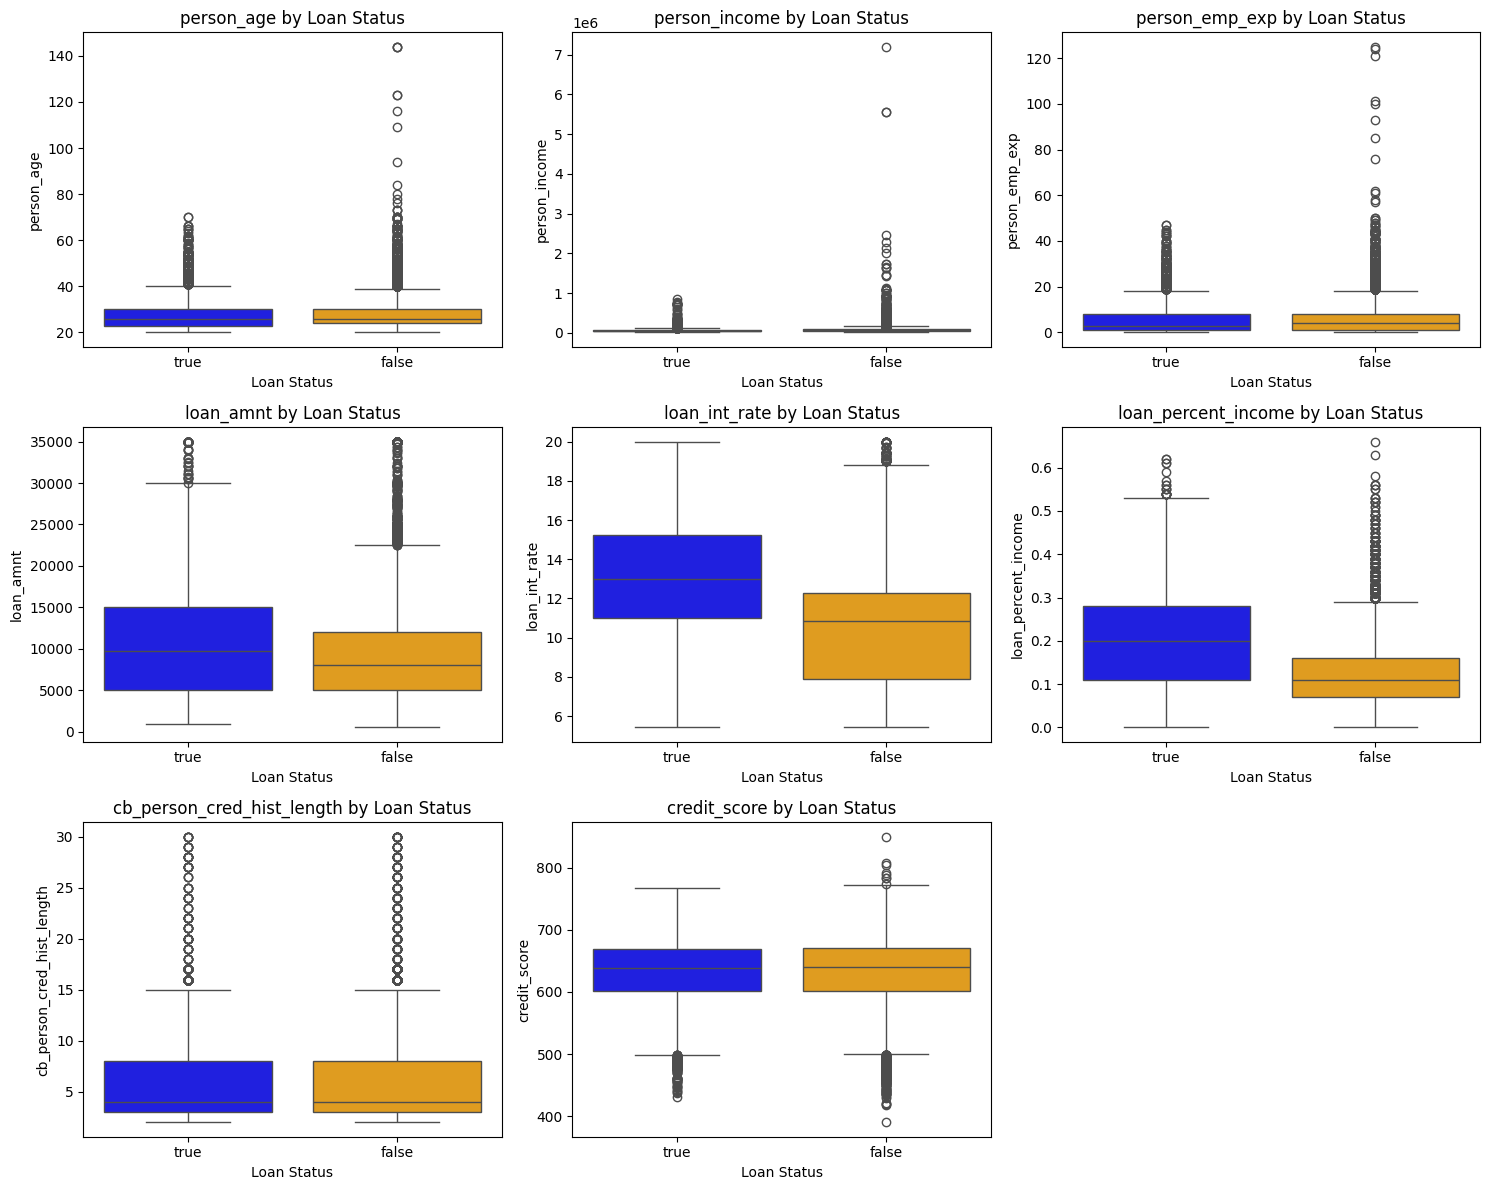

In [19]:
# Boxplot by Target: Compare numerical feature distributions by loan status
# num_cols = rawLoanData_filled.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Determine number of subplots (using 3 columns per row)
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows
# Set custom colors for loan_status: True (blue), False (orange)
custom_palette = {'true': 'blue', 'false': 'orange'}

# Plot boxplot by Target
for i, col in enumerate(num_cols):
    sns.boxplot(x='loan_status', y=col, data=rawLoanData_filled, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'{col} by Loan Status')
    axes[i].set_xlabel('Loan Status')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## H. Distribution Comparison by Loan Status
**What:** Use violin plots to compare the distribution of key numerical features for approved vs. not approved loans.  
**Why:** To visualize differences in the spread, central tendency, and shape of distributions between the two groups.  
**Observation:** Violin plots highlight where distributions differ most, helping to identify features that best separate the classes.

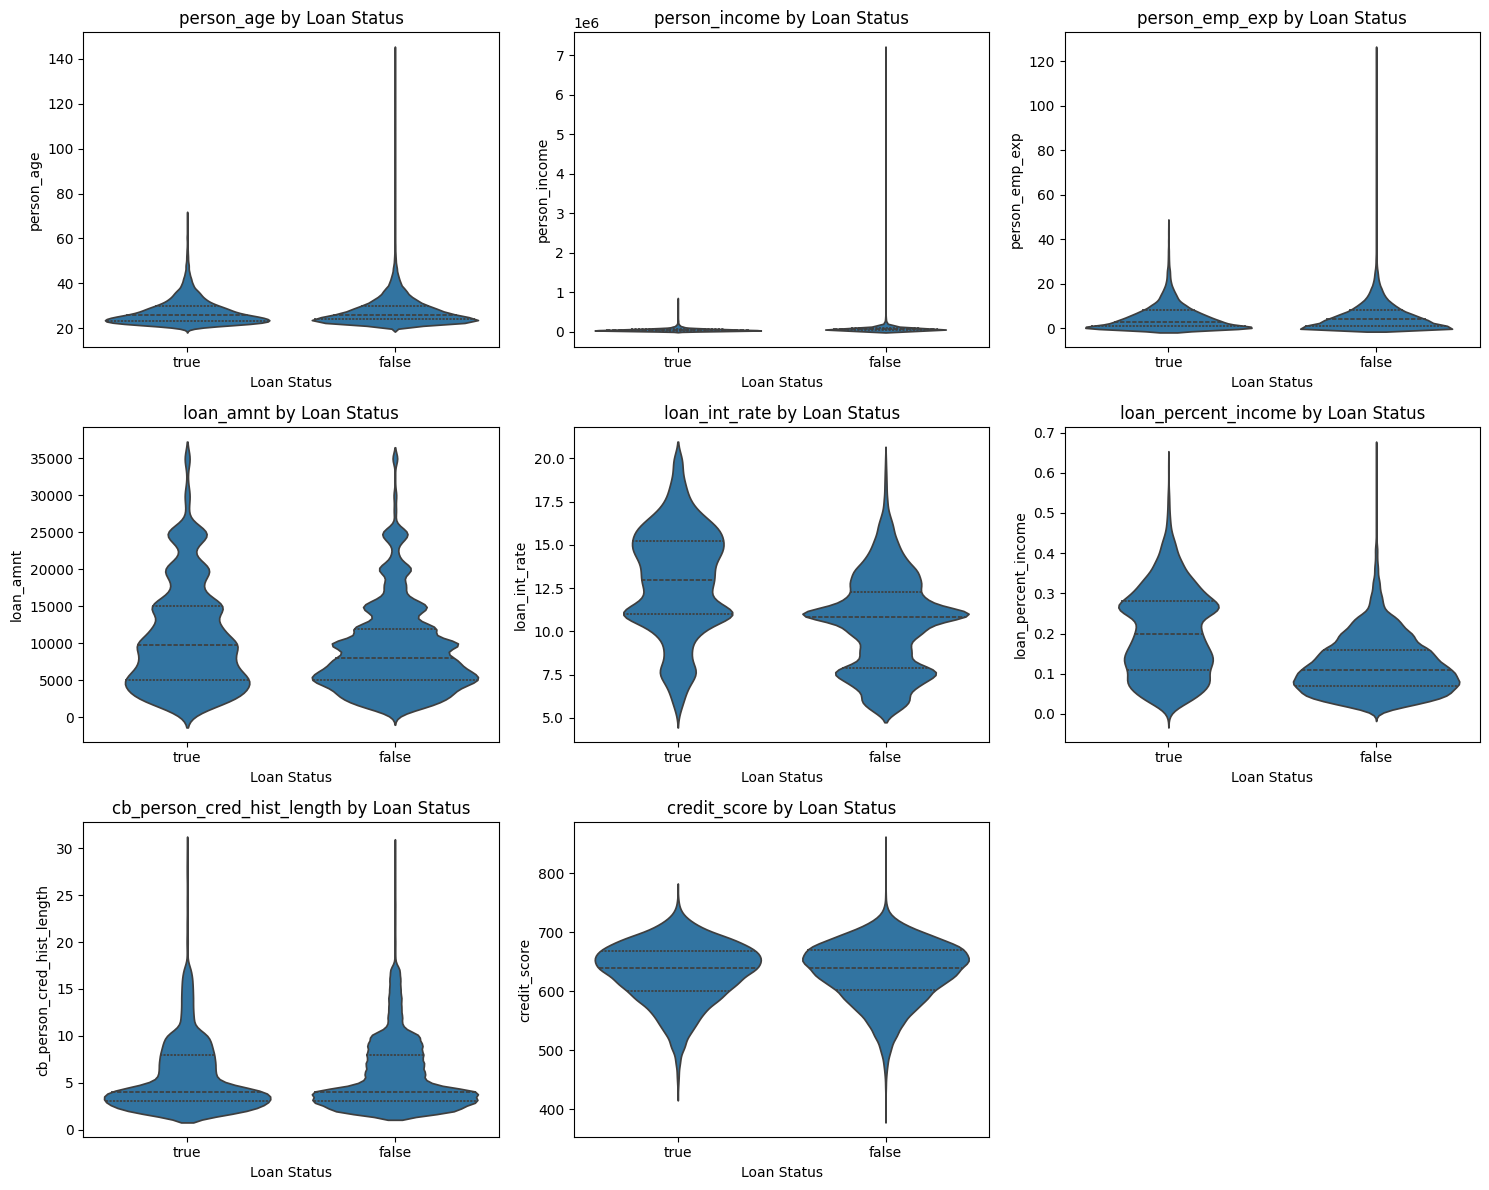

In [ ]:
# Distribution Comparison: Violin Plots by Loan Status
import seaborn as sns
import matplotlib.pyplot as plt

# Create a compact grid of violin plots for all numerical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.violinplot(x='loan_status', y=col, data=rawLoanData_filled, inner='quartile', ax=axes[i])
    axes[i].set_title(f'{col} by Loan Status')
    axes[i].set_xlabel('Loan Status')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# for col in num_cols:
  #  plt.figure(figsize=(7,4))
  #  sns.violinplot(x='loan_status', y=col, data=rawLoanData_filled, inner='quartile')
  #  plt.title(f'Distribution of {col} by Loan Status')
  #  plt.xlabel('Loan Status')
  #  plt.ylabel(col)
  #  plt.tight_layout()
  #  plt.show()


## G. Multicollinearity of Numerical Variables

**What:**  
Assess the presence of multicollinearity among numerical variables using statistical measures such as the Variance Inflation Factor (VIF).

**Why:**  
Multicollinearity occurs when two or more numerical features are highly correlated, meaning they contain overlapping information. Detecting multicollinearity is important because it can affect the interpretability of feature importance in many models and may lead to instability in regression coefficients.

**Observation:**  
High multicollinearity (as indicated by high VIF values) means that some features are strongly linearly related. While this does not typically impact the predictive accuracy of tree-based models like Random Forests, it can distort the interpretation of feature importance metrics such as the Gini Index. In such cases, importance is distributed among correlated features, making it difficult to identify which feature is truly influential. For regression models, high multicollinearity can also inflate standard errors and make coefficient estimates unreliable.


**Analysis for this data:**  
Several features (e.g., `person_age`, `credit_score`, `loan_int_rate`, `cb_person_cred_hist_length`, and `person_emp_exp`) show high VIF values, indicating strong multicollinearity. This suggests that these features are highly correlated and may affect the reliability of feature importance interpretation in subsequent modeling.

In [ ]:
# Multicollinearity Check: Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import pandas as pd

# Select only numerical columns (excluding the target)
X = rawLoanData_filled[num_cols].dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

# Bar plot of VIF values
plt.figure(figsize=(8,4))
plt.bar(vif_data['feature'], vif_data['VIF'])
plt.axhline(5, color='red', linestyle='--', label='VIF = 5')
plt.ylabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Numerical Features')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()